In [1]:
import pandas as pd

# Load the processed data from runs_processed.csv
runs = pd.read_csv("runs_processed.csv")

# 1. Exploratory Analysis, Data Collection, Pre-Preprocessing and Discussion


## 1.1 Context
**Where does your dataset come from? What is it for, how was it collected, etc.?**

Our dataset, stored in a DataFrame called `runs`, comes from our own exported GPS activity logs from Strava (a popular social media app to record workouts). We each downloaded our Strava data directly from Strava and merged the "activity.csv" files together to create one comprehensive dataset with all of our data. We even got some of our friends who also use Strava regularly to send us their statistics as well. Each row corresponds to a single activity with summary statistics such as:

- `Activity Date`, `Activity Type`
- `Moving Time`
- `Distance`
- `Pace`, `Grade Adjusted Pace`
- `Average Speed`, `Average Grade Adjusted Speed`
- `Elevation Gain`
- `Person`

We focus on **running activities** where `Activity Type` indicates a run.

In [2]:
runs.sample(5)

,Activity Date,Activity Type,Distance,Pace,Moving Time,Average Speed,Elevation Gain,Average Grade Adjusted Speed,Grade Adjusted Pace,Person
253,6/30/24,Run,2.03,9:41,19:43,6.20,0.0,6.20,9:41,Audrey
81,3/1/25,Run,5.06,7:46,39:16,7.73,26.9,7.75,7:45,Sam
317,4/30/25,Run,1.00,9:10,9:11,6.54,0.0,6.47,9:16,Audrey
330,10/6/25,Run,1.80,8:58,16:08,6.69,144.4,6.82,8:48,Audrey
419,10/30/25,Run,4.14,7:14,30:00,8.29,91.5,8.33,7:12,Zubin


## 1.2 Discussion
**Report how you processed the data (or how it was already processed)**

Key preprocessing steps:

- Add person column 
- Keep only relevant columns (activity, time, elevation, grade, person)
- Format columns to not be in imperial system (time column, mph column, distance, speed) 
- Filter to **running activities** only
- Merge all runners into one dataframe 
- Split into train/test

In [3]:
# Load the processed data from runs_processed.csv
runs = pd.read_csv("runs_processed.csv")

## 1.3 Code 
**Support your analysis with tables, plots, statistics, etc.**

DATASET OVERVIEW
Total number of runs: 420
Number of unique runners: 5
Date range: 2023-09-05 00:00:00 to 2025-11-26 00:00:00

RUNS PER PERSON
Person
Alex      128
Audrey    107
Zubin      84
Sam        73
Karina     28
dtype: int64



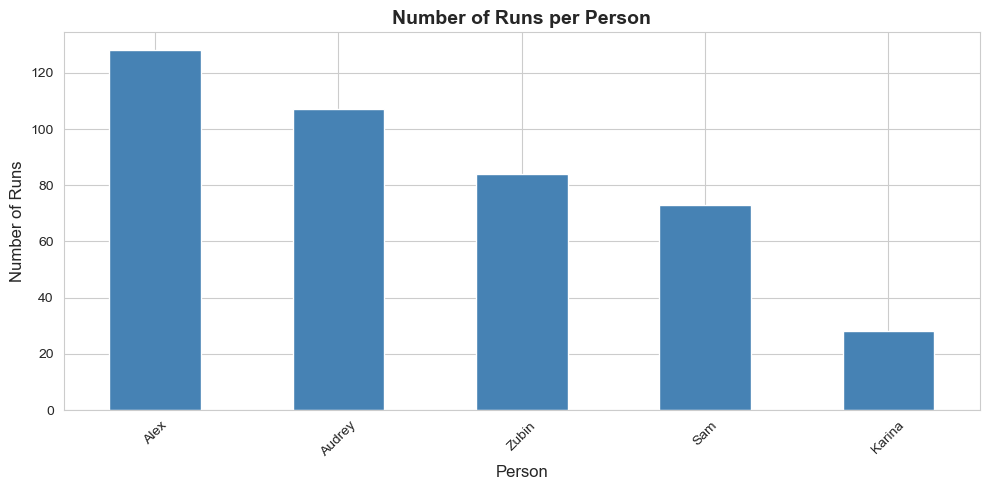

OUTLIER REMOVAL
Runs before outlier removal: 420
Runs after removing pace outliers (pace > 30 min/mile): 420
Removed 0 outlier runs

SUMMARY STATISTICS BY PERSON
       Distance                    Pace_numeric                     \
           mean   std   min    max         mean   std   min    max   
Person                                                               
Alex       3.85  2.09  0.51  10.08         7.47  0.51  5.95   9.18   
Audrey     2.45  1.35  0.10   8.01         9.72  0.93  7.18  13.52   
Karina     1.91  1.17  0.60   6.15         9.62  1.94  7.93  17.75   
Sam        3.40  2.41  0.02  13.04         7.54  1.57  5.93  16.90   
Zubin      4.57  2.03  1.09  13.15         7.65  0.71  6.42  10.37   

       Elevation Gain          
                 mean     std  
Person                         
Alex           136.09  108.80  
Audrey          63.87   58.01  
Karina         101.03   91.47  
Sam            106.87  141.05  
Zubin          169.54  123.70  



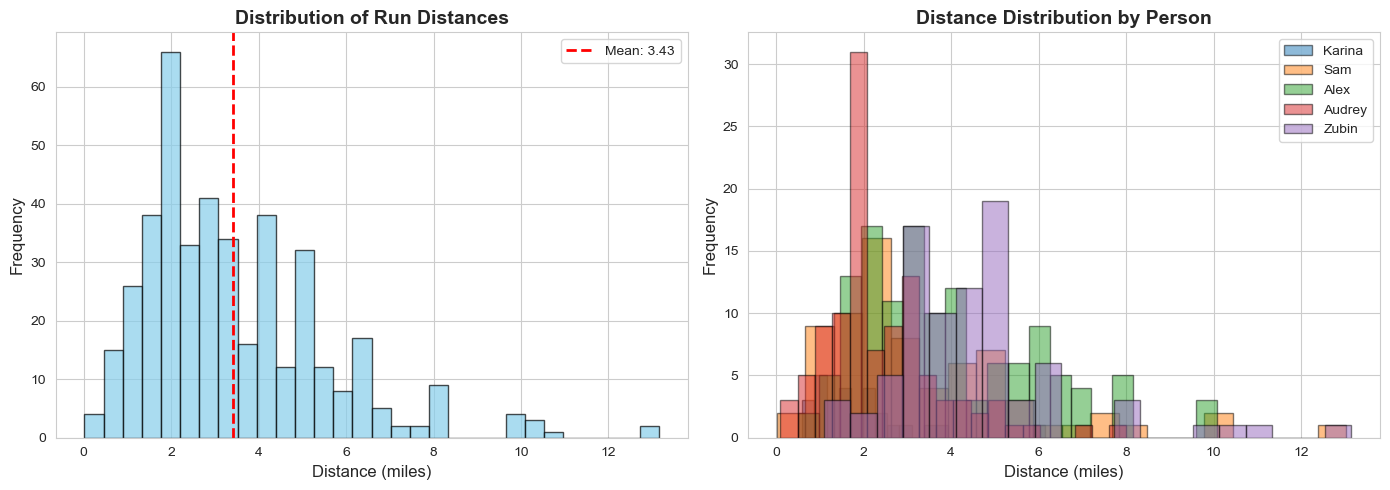

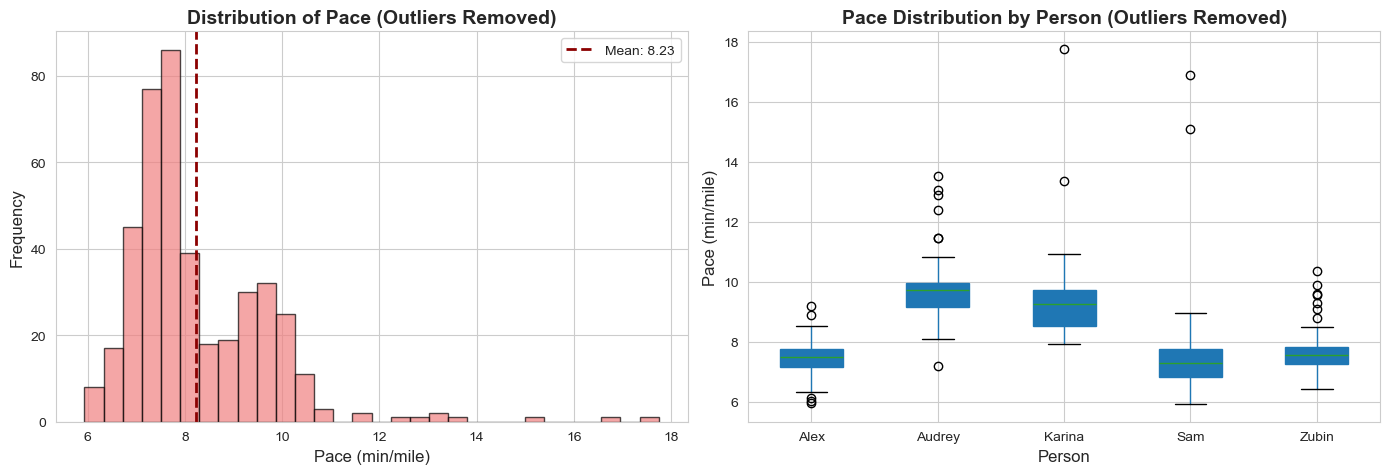

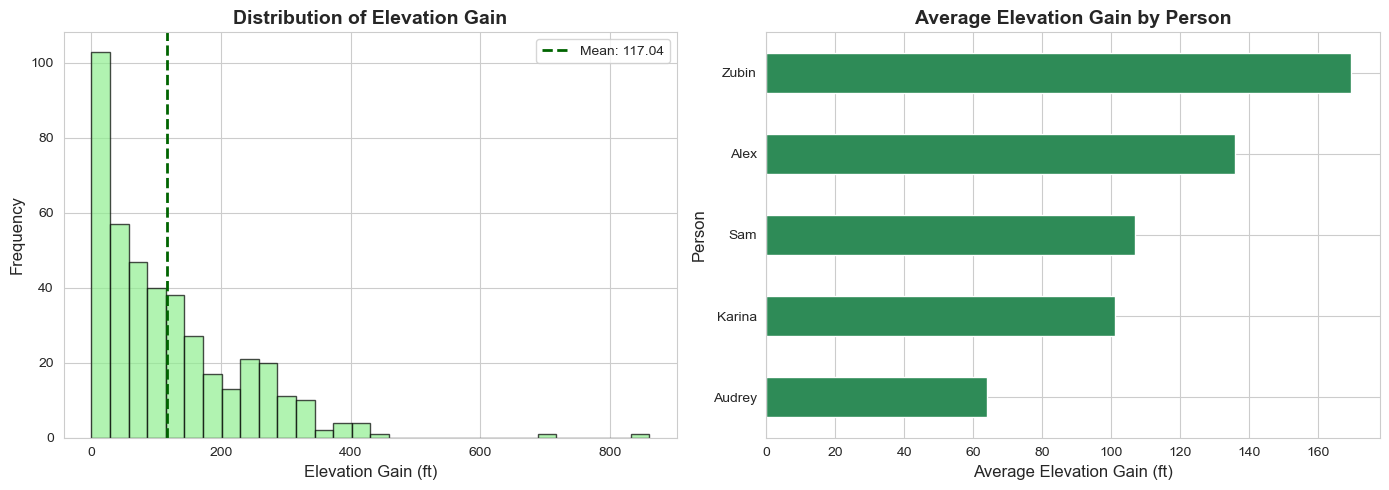

CORRELATION ANALYSIS
                              Distance  Pace_numeric  Average Speed  \
Distance                          1.00         -0.11           0.06   
Pace_numeric                     -0.11          1.00          -0.96   
Average Speed                     0.06         -0.96           1.00   
Elevation Gain                    0.63         -0.08           0.06   
Average Grade Adjusted Speed      0.11         -0.95           0.99   
Grade Adjusted Pace_numeric      -0.15          0.99          -0.96   

                              Elevation Gain  Average Grade Adjusted Speed  \
Distance                                0.63                          0.11   
Pace_numeric                           -0.08                         -0.95   
Average Speed                           0.06                          0.99   
Elevation Gain                          1.00                          0.14   
Average Grade Adjusted Speed            0.14                          1.00   
Grade Adjuste

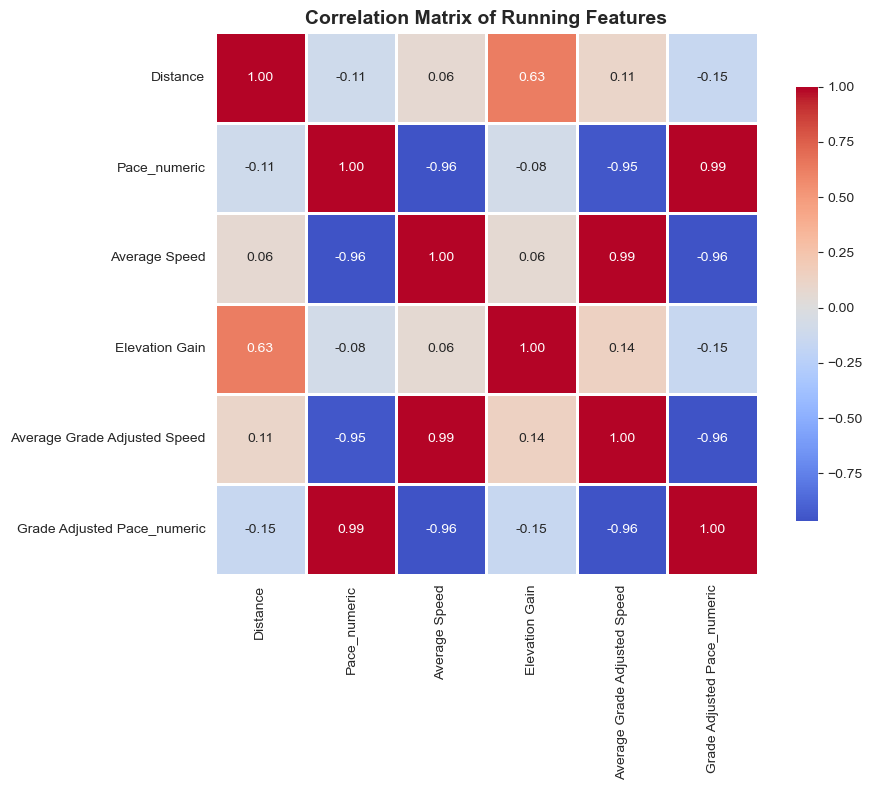

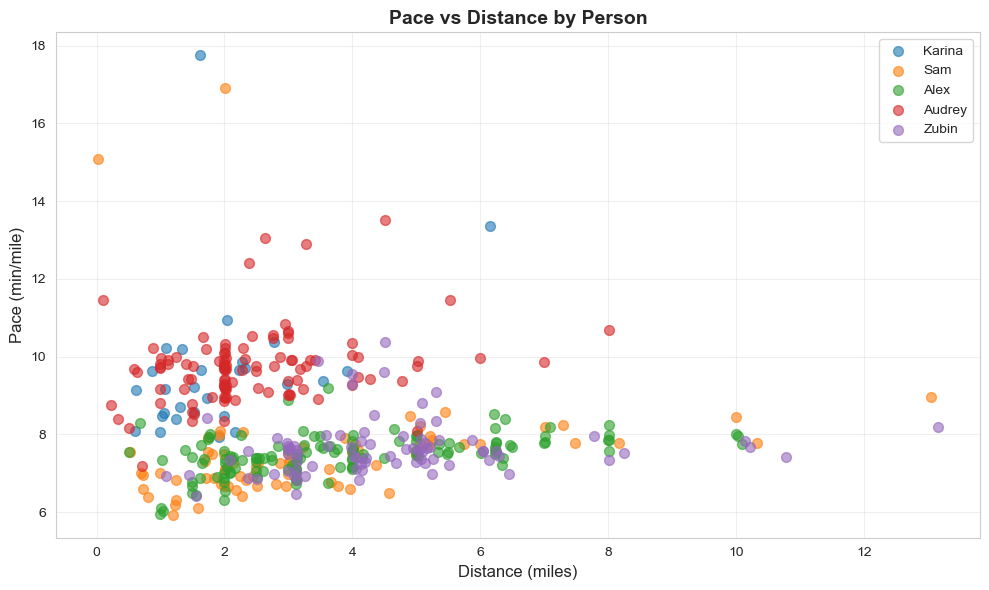

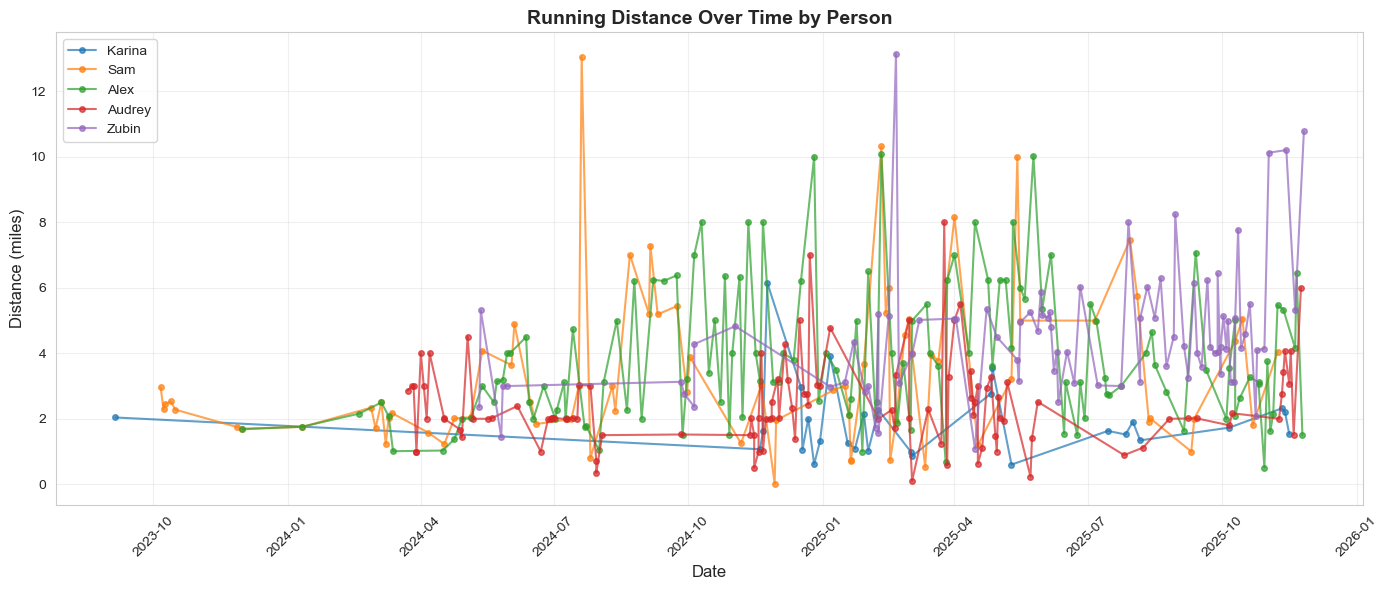

KEY INSIGHTS
• Average run distance: 3.43 miles
• Average pace: 8.23 min/mile
• Average elevation gain: 117.04 feet
• Most active runner: Alex with 128 runs
• Fastest average pace: Alex
• Longest average distance: Zubin


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Convert Activity Date to datetime for analysis
runs['Activity Date'] = pd.to_datetime(runs['Activity Date'])

# --- BASIC DATASET STATISTICS ---
print("DATASET OVERVIEW")
print(f"Total number of runs: {len(runs)}")
print(f"Number of unique runners: {runs['Person'].nunique()}")
print(f"Date range: {runs['Activity Date'].min()} to {runs['Activity Date'].max()}")
print()

# --- RUNS PER PERSON ---
print("RUNS PER PERSON")
runs_per_person = runs.groupby('Person').size().sort_values(ascending=False)
print(runs_per_person)
print()

# --- VISUALIZE RUNS PER PERSON ---
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
runs_per_person.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Number of Runs per Person', fontsize=14, fontweight='bold')
ax.set_xlabel('Person', fontsize=12)
ax.set_ylabel('Number of Runs', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# --- CONVERT PACE TO NUMERIC FOR ANALYSIS ---
def pace_str_to_float(p):
    if pd.isna(p):
        return np.nan
    if isinstance(p, str) and ":" in p:
        m, s = p.split(":")
        return float(m) + float(s)/60
    return float(p)

runs['Pace_numeric'] = runs['Pace'].apply(pace_str_to_float)
runs['Grade Adjusted Pace_numeric'] = runs['Grade Adjusted Pace'].apply(pace_str_to_float)

# --- REMOVE EXTREME OUTLIERS (pace > 30 min/mile is unrealistic for running) ---
print("OUTLIER REMOVAL")
print(f"Runs before outlier removal: {len(runs)}")
runs_clean = runs[runs['Pace_numeric'] <= 30].copy()
print(f"Runs after removing pace outliers (pace > 30 min/mile): {len(runs_clean)}")
print(f"Removed {len(runs) - len(runs_clean)} outlier runs")
print()

# Use cleaned data for all subsequent analysis
runs = runs_clean

# --- SUMMARY STATISTICS BY PERSON ---
print("SUMMARY STATISTICS BY PERSON")
summary_stats = runs.groupby('Person').agg({
    'Distance': ['mean', 'std', 'min', 'max'],
    'Pace_numeric': ['mean', 'std', 'min', 'max'],
    'Elevation Gain': ['mean', 'std']
}).round(2)
print(summary_stats)
print()

# --- DISTRIBUTION OF DISTANCES ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall distance distribution
axes[0].hist(runs['Distance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Run Distances', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Distance (miles)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(runs['Distance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {runs["Distance"].mean():.2f}')
axes[0].legend()

# Distance distribution by person
for person in runs['Person'].unique():
    person_data = runs[runs['Person'] == person]['Distance']
    axes[1].hist(person_data, bins=20, alpha=0.5, label=person, edgecolor='black')
axes[1].set_title('Distance Distribution by Person', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Distance (miles)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

# --- DISTRIBUTION OF PACE ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall pace distribution
axes[0].hist(runs['Pace_numeric'].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Pace (Outliers Removed)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Pace (min/mile)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(runs['Pace_numeric'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {runs["Pace_numeric"].mean():.2f}')
axes[0].legend()

# Pace distribution by person (boxplot)
runs.boxplot(column='Pace_numeric', by='Person', ax=axes[1], patch_artist=True)
axes[1].set_title('Pace Distribution by Person (Outliers Removed)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Person', fontsize=12)
axes[1].set_ylabel('Pace (min/mile)', fontsize=12)
plt.suptitle('')  # Remove the automatic title from boxplot

plt.tight_layout()
plt.show()

# --- ELEVATION GAIN ANALYSIS ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall elevation gain distribution
axes[0].hist(runs['Elevation Gain'].dropna(), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Elevation Gain', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Elevation Gain (ft)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(runs['Elevation Gain'].mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {runs["Elevation Gain"].mean():.2f}')
axes[0].legend()

# Elevation gain by person
elevation_by_person = runs.groupby('Person')['Elevation Gain'].mean().sort_values()
elevation_by_person.plot(kind='barh', ax=axes[1], color='seagreen')
axes[1].set_title('Average Elevation Gain by Person', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Elevation Gain (ft)', fontsize=12)
axes[1].set_ylabel('Person', fontsize=12)

plt.tight_layout()
plt.show()

# --- CORRELATION ANALYSIS ---
print("CORRELATION ANALYSIS")
numeric_cols = ['Distance', 'Pace_numeric', 'Average Speed', 'Elevation Gain', 
                'Average Grade Adjusted Speed', 'Grade Adjusted Pace_numeric']
correlation_matrix = runs[numeric_cols].corr()
print(correlation_matrix.round(2))
print()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Running Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# --- PACE vs DISTANCE SCATTER ---
plt.figure(figsize=(10, 6))
for person in runs['Person'].unique():
    person_data = runs[runs['Person'] == person]
    plt.scatter(person_data['Distance'], person_data['Pace_numeric'],
                alpha=0.6, label=person, s=50)
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Pace (min/mile)', fontsize=12)
plt.title('Pace vs Distance by Person', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- TEMPORAL TRENDS ---
runs_sorted = runs.sort_values('Activity Date')

plt.figure(figsize=(14, 6))
for person in runs['Person'].unique():
    person_data = runs_sorted[runs_sorted['Person'] == person]
    plt.plot(person_data['Activity Date'], person_data['Distance'],
             marker='o', alpha=0.7, label=person, markersize=4)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Distance (miles)', fontsize=12)
plt.title('Running Distance Over Time by Person', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- KEY INSIGHTS ---
print("KEY INSIGHTS")
print(f"• Average run distance: {runs['Distance'].mean():.2f} miles")
print(f"• Average pace: {runs['Pace_numeric'].mean():.2f} min/mile")
print(f"• Average elevation gain: {runs['Elevation Gain'].mean():.2f} feet")
print(f"• Most active runner: {runs_per_person.idxmax()} with {runs_per_person.max()} runs")
print(f"• Fastest average pace: {runs.groupby('Person')['Pace_numeric'].mean().idxmin()}")
print(f"• Longest average distance: {runs.groupby('Person')['Distance'].mean().idxmax()}")

# 2. Predictive Task

## 2.1 Task Definition
**Identify the predictive task you will study**

We will study a **supervised regression** task focused on modeling runners future runs using a **two-stage prediction approach**.

> **Given a runner's full training history, first predict the distance of their *next run*, then predict their pace at that predicted distance.**

This approach recognizes that pace is inherently distance dependent. A runner's pace for a 3 mile run differs from their pace for a 10 mile run. By first predicting distance and then conditioning pace on that distance, we can leverage the runner's historical performance at similar distances.

### Stage 1: Distance Prediction

**Inputs (features):**
For each runner, we use their **running history** to extract these features:

- **Distance history**
  - Last run distance 
  - Mean distance across all past runs 
  - Recent distance summary statistics 

- **Training patterns**
  - Time between runs (recovery indicator)
  - Recent running frequency (runs per week)

- **Runner Identity (one hot encoded)**

**Output for Stage 1:**
- `next_run_distance`: distance of the next run in miles

### Stage 2: Pace Prediction

**Inputs (features):**

- **Predicted distance** (from Stage 1)

- **Historical distance and pace summary stats**

- **Pace history**
  - Mean pace
  - Mean pace as siilar distances 

- **Runner Identity (one hot encoded)**

**Output for Stage 2:**
- `next_run_pace`: pace of the next run in minutes per mile

## 2.2 Evaluation Strategy
**Describe how you will evaluate your model at this predictive task**


We evaluate our models using a **held out test set and standard regression error metrics**:

- 20/80 Train-Test Split:
  - **Training set** for fitting and tuning 
  - **Test set** for final evaluation

- **Mean Absolute Error (MAE)**:  
  - Distance MAE: avg absolute error in miles 
  - Pace MAE: avg absolute error in minutes per mile 
  - Total MAE = Distance MAE + Pace MAE (single scalar summarizing full prediction quality)

- **RMSE as a secondary metric**

## 2.3 Relevant Baselines 
**What relevant baselines can be used for comparison?**

We compare our model against three baselines: 
 1. Last Distance + Overall Mean Pace
    - Runners often repeat similar distances and maintain a steady pace 
 2. Mean Distance + Mean Pace at Similar Distance 
    - Uses historical averages 
 3. Last Distance + Mean Pace at Similar Distance 
    - Strongest baseline as it mirrors the strucure of our model but without any learned weights

All baselines are evaluated on the same test data. Distance MAE, pace MAE, and Total MAE is used for evaluation. 

## 2.4 Validity of Predictions
**How you will assess the validity of your model’s predictions?**

1. Held-Out Test Performance
    - The final Ridge models are evaluated on a test set ensuring the model is not over/underfitting the data. 

2. Error Analysis and Sanity Checks
    - Using predictions_df, we inspect best and worst predictions by total error 
    - Analyze per-person error statistics to ensure balanced performance

3. Next-Run Predictions
    - Verify predicted distances fall within each runner’s historical range
    - Verify predicted paces align with historical pace distributions

4. Consistency with Training Behavior
    - Longer distances = generally slower paces
    - Higher recent training volume = more stable predictions
    - Verify no future information is used to predict the past


# 3 Modeling

## 3.1 Context 
**How do you formulate your task as an ML problem, e.g. what are the inputs, outputs, and what is being optimized? What models are appropriate for the task?**

## 3.2 Discussion
**Discuss the advantages and disadvantages of different modeling approaches (complexity, efficiency, challenges in implementation, etc.)**

## 3.3 Code
**Walk through your code, explaining architectural choices and any implementation details.**

In [6]:
#Convert MM:SS pace to numeric 
def pace_str_to_float(p):
    if pd.isna(p):
        return np.nan
    if isinstance(p, str) and ":" in p:
        m, s = p.split(":")
        return float(m) + float(s)/60
    return float(p)

runs["Pace_numeric"] = runs["Pace"].apply(pace_str_to_float)
#Sort Data by Date (Important for time trends)
runs["Activity Date"] = pd.to_datetime(runs["Activity Date"])
runs = runs.sort_values(["Person", "Activity Date"]).reset_index(drop=True)

In [7]:
# Two-stage prediction: First predict distance, then predict pace given that distance
import numpy as np
from datetime import timedelta

# Need at least 3 runs to have meaningful history
MIN_HISTORY = 3

distance_feature_rows = []
pace_feature_rows = []

for person, person_df in runs.groupby("Person"):
    person_df = person_df.sort_values("Activity Date").reset_index(drop=True)
    
    for i in range(MIN_HISTORY, len(person_df) - 1):
        # Full history up to current point
        full_hist = person_df.iloc[:i]
        recent_hist = person_df.iloc[max(0, i-5):i]  # Last 5 runs
        longer_hist = person_df.iloc[max(0, i-10):i]  # Last 10 runs
        
        next_run = person_df.iloc[i+1]
        current_run = person_df.iloc[i]
        
        # Calculate days since last run
        days_since_last = (current_run["Activity Date"] - person_df.iloc[i-1]["Activity Date"]).days
        
        # Calculate running frequency (runs per week, approximate)
        if len(full_hist) > 1:
            date_range = (full_hist.iloc[-1]["Activity Date"] - full_hist.iloc[0]["Activity Date"]).days
            runs_per_week = len(full_hist) / max(date_range / 7, 1)
        else:
            runs_per_week = 0
        
        # ===== STAGE 1: DISTANCE PREDICTION FEATURES =====
        dist_row = {
            "Person": person,
            
            # Full history distance features
            "dist_mean_all": full_hist["Distance"].mean(),
            "dist_std_all": full_hist["Distance"].std(),
            "dist_median_all": full_hist["Distance"].median(),
            "dist_last": current_run["Distance"],
            
            # Recent vs longer-term trends
            "dist_mean_recent": recent_hist["Distance"].mean() if len(recent_hist) > 0 else full_hist["Distance"].mean(),
            "dist_mean_longer": longer_hist["Distance"].mean() if len(longer_hist) > 0 else full_hist["Distance"].mean(),
            
            # Distance trends
            "dist_slope_recent": np.polyfit(range(len(recent_hist)), recent_hist["Distance"], 1)[0] if len(recent_hist) > 1 else 0,
            "dist_slope_longer": np.polyfit(range(len(longer_hist)), longer_hist["Distance"], 1)[0] if len(longer_hist) > 1 else 0,
            
            # Training patterns
            "elev_gain_mean_all": full_hist["Elevation Gain"].mean(),
            "elev_gain_mean_recent": recent_hist["Elevation Gain"].mean() if len(recent_hist) > 0 else full_hist["Elevation Gain"].mean(),
            
            # Recovery and frequency
            "days_since_last": days_since_last,
            "runs_per_week": runs_per_week,
            
            # Target
            "next_run_distance": next_run["Distance"]
        }
        distance_feature_rows.append(dist_row)
        
        # ===== STAGE 2: PACE PREDICTION FEATURES =====
        # Use the ACTUAL next run distance (we'll replace this with predicted distance later)
        predicted_dist = next_run["Distance"]  # For training, use actual distance
        
        # Find runs at similar distances
        dist_tolerance_05 = 0.5
        dist_tolerance_1 = 1.0
        
        similar_runs_05 = full_hist[
            (full_hist["Distance"] >= predicted_dist - dist_tolerance_05) &
            (full_hist["Distance"] <= predicted_dist + dist_tolerance_05)
        ]
        
        similar_runs_1 = full_hist[
            (full_hist["Distance"] >= predicted_dist - dist_tolerance_1) &
            (full_hist["Distance"] <= predicted_dist + dist_tolerance_1)
        ]
        
        pace_row = {
            "Person": person,
            
            # Predicted distance (from Stage 1)
            "predicted_distance": predicted_dist,
            
            # Historical pace at similar distances
            "pace_mean_similar_05": similar_runs_05["Pace_numeric"].mean() if len(similar_runs_05) > 0 else full_hist["Pace_numeric"].mean(),
            "pace_mean_similar_1": similar_runs_1["Pace_numeric"].mean() if len(similar_runs_1) > 0 else full_hist["Pace_numeric"].mean(),
            "num_runs_similar_05": len(similar_runs_05),
            "num_runs_similar_1": len(similar_runs_1),
            
            # Overall pace history
            "pace_mean_all": full_hist["Pace_numeric"].mean(),
            "pace_std_all": full_hist["Pace_numeric"].std(),
            "pace_mean_recent": recent_hist["Pace_numeric"].mean() if len(recent_hist) > 0 else full_hist["Pace_numeric"].mean(),
            "pace_slope_recent": np.polyfit(range(len(recent_hist)), recent_hist["Pace_numeric"], 1)[0] if len(recent_hist) > 1 else 0,
            
            # Terrain context for similar distances
            "elev_gain_mean_similar": similar_runs_1["Elevation Gain"].mean() if len(similar_runs_1) > 0 else full_hist["Elevation Gain"].mean(),
            "elev_gain_mean_recent": recent_hist["Elevation Gain"].mean() if len(recent_hist) > 0 else full_hist["Elevation Gain"].mean(),
            
            # Recovery and timing
            "days_since_last": days_since_last,
            "runs_per_week": runs_per_week,
            
            # Target
            "next_run_pace": next_run["Pace_numeric"]
        }
        pace_feature_rows.append(pace_row)

# Create dataframes
distance_df = pd.DataFrame(distance_feature_rows)
pace_df = pd.DataFrame(pace_feature_rows)

# Remove rows with NaN values
distance_df = distance_df.dropna()
pace_df = pace_df.dropna()

print(f"Distance prediction dataset: {len(distance_df)} samples")
print(f"Pace prediction dataset: {len(pace_df)} samples")
print("\nDistance features:")
print(distance_df.head())

Distance prediction dataset: 400 samples
Pace prediction dataset: 400 samples

Distance features:
  Person  dist_mean_all  dist_std_all  dist_median_all  dist_last  \
0   Alex       1.866667      0.257164             1.76       2.50   
1   Alex       2.025000      0.379956             1.96       2.08   
2   Alex       2.036000      0.329970             2.08       1.01   
3   Alex       1.865000      0.512396             1.92       1.03   
4   Alex       1.745714      0.564265             1.76       1.38   

   dist_mean_recent  dist_mean_longer  dist_slope_recent  dist_slope_longer  \
0          1.866667          1.866667              0.240           0.240000   
1          2.025000          2.025000              0.286           0.286000   
2          2.036000          2.036000              0.154           0.154000   
3          1.902000          1.865000             -0.158          -0.058571   
4          1.756000          1.745714             -0.375          -0.126071   

   elev_gain

In [8]:
# ===== STAGE 1: DISTANCE PREDICTION =====
X_dist = distance_df.drop(columns=["next_run_distance"])
y_dist = distance_df["next_run_distance"]

# ===== STAGE 2: PACE PREDICTION =====
X_pace = pace_df.drop(columns=["next_run_pace"])
y_pace = pace_df["next_run_pace"]

# Preprocessing setup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create preprocessors for both stages
def create_preprocessor(X):
    numeric_features = X.drop(columns=["Person"]).columns.tolist()
    categorical_features = ["Person"]
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
        ]
    )
    return preprocessor

# Train/test split for distance prediction
X_dist_train, X_dist_test, y_dist_train, y_dist_test = train_test_split(
    X_dist, y_dist, test_size=0.2, random_state=42
)

# Train/test split for pace prediction (using same random state for consistency)
X_pace_train, X_pace_test, y_pace_train, y_pace_test = train_test_split(
    X_pace, y_pace, test_size=0.2, random_state=42
)

# Create preprocessors
preprocessor_dist = create_preprocessor(X_dist_train)
preprocessor_pace = create_preprocessor(X_pace_train)

print(f"Distance training set: {len(X_dist_train)} samples")
print(f"Distance test set: {len(X_dist_test)} samples")
print(f"Pace training set: {len(X_pace_train)} samples")
print(f"Pace test set: {len(X_pace_test)} samples")


Distance training set: 320 samples
Distance test set: 80 samples
Pace training set: 320 samples
Pace test set: 80 samples


In [9]:
# ===== RIDGE REGRESSION: TWO-STAGE PREDICTION MODEL =====
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hyperparameter grid for Ridge regression
param_grid = {
    "model__alpha": [0.01, 0.1, 1, 10, 50, 100]
}

# ===== STAGE 1: RIDGE REGRESSION FOR DISTANCE PREDICTION =====
ridge_pipe_dist = Pipeline([
    ("preprocess", preprocessor_dist),
    ("model", Ridge())
])

# Use GridSearchCV to find best hyperparameters
ridge_grid_dist = GridSearchCV(
    ridge_pipe_dist, param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

ridge_grid_dist.fit(X_dist_train, y_dist_train)
best_ridge_dist = ridge_grid_dist.best_estimator_

# Make predictions on test set
dist_pred = best_ridge_dist.predict(X_dist_test)

print("STAGE 1: DISTANCE PREDICTION (Ridge Regression)")
print("Best Ridge alpha (Distance):", ridge_grid_dist.best_params_)
print("Distance MAE:", mean_absolute_error(y_dist_test, dist_pred))
print("Distance RMSE:", np.sqrt(mean_squared_error(y_dist_test, dist_pred)))
print()

# ===== STAGE 2: RIDGE REGRESSION FOR PACE PREDICTION =====
ridge_pipe_pace = Pipeline([
    ("preprocess", preprocessor_pace),
    ("model", Ridge())
])

# Use GridSearchCV to find best hyperparameters
ridge_grid_pace = GridSearchCV(
    ridge_pipe_pace, param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

ridge_grid_pace.fit(X_pace_train, y_pace_train)
best_ridge_pace = ridge_grid_pace.best_estimator_

# Update pace features with predicted distances from Stage 1
X_pace_test_with_pred = X_pace_test.copy()
X_pace_test_with_pred["predicted_distance"] = dist_pred

# Make pace predictions using predicted distances
pace_pred = best_ridge_pace.predict(X_pace_test_with_pred)

print("STAGE 2: PACE PREDICTION (Ridge Regression, using predicted distances)")
print("Best Ridge alpha (Pace):", ridge_grid_pace.best_params_)
print("Pace MAE:", mean_absolute_error(y_pace_test, pace_pred))
print("Pace RMSE:", np.sqrt(mean_squared_error(y_pace_test, pace_pred)))
print()

# Overall two-stage performance
print("TWO-STAGE RIDGE REGRESSION MODEL PERFORMANCE")
print(f"Distance MAE: {mean_absolute_error(y_dist_test, dist_pred):.4f} miles")
print(f"Pace MAE: {mean_absolute_error(y_pace_test, pace_pred):.4f} min/mile")
print(f"Total MAE: {mean_absolute_error(y_dist_test, dist_pred) + mean_absolute_error(y_pace_test, pace_pred):.4f}")


STAGE 1: DISTANCE PREDICTION (Ridge Regression)
Best Ridge alpha (Distance): {'model__alpha': 100}
Distance MAE: 1.2266263761934346
Distance RMSE: 1.6272134054394038

STAGE 2: PACE PREDICTION (Ridge Regression, using predicted distances)
Best Ridge alpha (Pace): {'model__alpha': 0.1}
Pace MAE: 0.5654764169011852
Pace RMSE: 0.7354660712164223

TWO-STAGE RIDGE REGRESSION MODEL PERFORMANCE
Distance MAE: 1.2266 miles
Pace MAE: 0.5655 min/mile
Total MAE: 1.7921


In [10]:
# ===== EXAMPLE PREDICTIONS: SHOWING MODEL PERFORMANCE =====
# Create a dataframe with actual vs predicted values for analysis
predictions_df = pd.DataFrame({
    "Person": X_dist_test["Person"].values,
    "Actual_Distance": y_dist_test.values,
    "Predicted_Distance": dist_pred,
    "Distance_Error": np.abs(y_dist_test.values - dist_pred),
    "Actual_Pace": y_pace_test.values,
    "Predicted_Pace": pace_pred,
    "Pace_Error": np.abs(y_pace_test.values - pace_pred),
    "Last_Distance": X_dist_test["dist_last"].values,
    "Mean_Distance": X_dist_test["dist_mean_all"].values
})

# Calculate percentage errors
predictions_df["Distance_Error_Pct"] = (predictions_df["Distance_Error"] / predictions_df["Actual_Distance"] * 100).round(2)
predictions_df["Pace_Error_Pct"] = (predictions_df["Pace_Error"] / predictions_df["Actual_Pace"] * 100).round(2)

# Sort by total error to see best and worst predictions
predictions_df["Total_Error"] = predictions_df["Distance_Error"] + predictions_df["Pace_Error"]
predictions_df = predictions_df.sort_values("Total_Error")

print("EXAMPLE PREDICTIONS: BEST AND WORST PERFORMANCE")
print("\n--- BEST PREDICTIONS (Lowest Total Error) ---")
print(predictions_df.head(10)[["Person", "Actual_Distance", "Predicted_Distance", 
                                "Distance_Error", "Actual_Pace", "Predicted_Pace", 
                                "Pace_Error", "Total_Error"]].to_string(index=False))

print("\n--- WORST PREDICTIONS (Highest Total Error) ---")
print(predictions_df.tail(10)[["Person", "Actual_Distance", "Predicted_Distance", 
                                "Distance_Error", "Actual_Pace", "Predicted_Pace", 
                                "Pace_Error", "Total_Error"]].to_string(index=False))

print("\n--- SUMMARY STATISTICS BY PERSON ---")
person_stats = predictions_df.groupby("Person").agg({
    "Distance_Error": ["mean", "std"],
    "Pace_Error": ["mean", "std"],
    "Total_Error": ["mean", "std"]
}).round(3)
print(person_stats)

# Show some random examples
print("\n--- RANDOM SAMPLE OF PREDICTIONS ---")
sample_predictions = predictions_df.sample(10, random_state=42).sort_index()
print(sample_predictions[["Person", "Actual_Distance", "Predicted_Distance", 
                          "Distance_Error", "Actual_Pace", "Predicted_Pace", 
                          "Pace_Error"]].to_string(index=False))



EXAMPLE PREDICTIONS: BEST AND WORST PERFORMANCE

--- BEST PREDICTIONS (Lowest Total Error) ---
Person  Actual_Distance  Predicted_Distance  Distance_Error  Actual_Pace  Predicted_Pace  Pace_Error  Total_Error
  Alex             4.01            4.083851        0.073851     7.600000        7.495695    0.104305     0.178156
  Alex             3.76            3.851757        0.091757     7.633333        7.515108    0.118225     0.209982
 Zubin             4.58            4.754199        0.174199     7.433333        7.524698    0.091365     0.265564
  Alex             2.08            2.320910        0.240910     7.016667        7.119187    0.102521     0.343431
 Zubin             3.13            3.417514        0.287514     7.500000        7.410530    0.089470     0.376984
  Alex             4.01            4.045405        0.035405     7.650000        7.298090    0.351910     0.387316
 Zubin             5.00            4.738081        0.261919     7.300000        7.533925    0.233925     0.

In [11]:
# ===== PREDICT NEXT RUN FOR EACH PERSON =====
# Predict distance and pace for each person's next run using their full history

next_run_predictions = []

for person, person_df in runs.groupby("Person"):
    person_df = person_df.sort_values("Activity Date").reset_index(drop=True)
    
    if len(person_df) < MIN_HISTORY:
        # Skip if person doesn't have enough history
        continue
    
    # Use all runs as history for predicting the next run
    full_hist = person_df
    recent_hist = person_df.iloc[-5:] if len(person_df) >= 5 else person_df
    longer_hist = person_df.iloc[-10:] if len(person_df) >= 10 else person_df
    
    current_run = person_df.iloc[-1]  # Most recent run
    
    # Calculate days since last run (will be 0 or more, depending on when last run was)
    if len(person_df) > 1:
        days_since_last = (current_run["Activity Date"] - person_df.iloc[-2]["Activity Date"]).days
    else:
        days_since_last = 0
    
    # Calculate running frequency
    if len(full_hist) > 1:
        date_range = (full_hist.iloc[-1]["Activity Date"] - full_hist.iloc[0]["Activity Date"]).days
        runs_per_week = len(full_hist) / max(date_range / 7, 1)
    else:
        runs_per_week = 0
    
    # ===== STAGE 1: CREATE DISTANCE PREDICTION FEATURES =====
    dist_features = {
        "Person": person,
        "dist_mean_all": full_hist["Distance"].mean(),
        "dist_std_all": full_hist["Distance"].std(),
        "dist_median_all": full_hist["Distance"].median(),
        "dist_last": current_run["Distance"],
        "dist_mean_recent": recent_hist["Distance"].mean(),
        "dist_mean_longer": longer_hist["Distance"].mean(),
        "dist_slope_recent": np.polyfit(range(len(recent_hist)), recent_hist["Distance"], 1)[0] if len(recent_hist) > 1 else 0,
        "dist_slope_longer": np.polyfit(range(len(longer_hist)), longer_hist["Distance"], 1)[0] if len(longer_hist) > 1 else 0,
        "elev_gain_mean_all": full_hist["Elevation Gain"].mean(),
        "elev_gain_mean_recent": recent_hist["Elevation Gain"].mean(),
        "days_since_last": days_since_last,
        "runs_per_week": runs_per_week
    }
    
    # Convert to DataFrame for prediction
    dist_features_df = pd.DataFrame([dist_features])
    
    # Predict distance
    predicted_distance = best_ridge_dist.predict(dist_features_df)[0]
    
    # ===== STAGE 2: CREATE PACE PREDICTION FEATURES =====
    # Use predicted distance to find similar runs
    dist_tolerance_05 = 0.5
    dist_tolerance_1 = 1.0
    
    similar_runs_05 = full_hist[
        (full_hist["Distance"] >= predicted_distance - dist_tolerance_05) &
        (full_hist["Distance"] <= predicted_distance + dist_tolerance_05)
    ]
    
    similar_runs_1 = full_hist[
        (full_hist["Distance"] >= predicted_distance - dist_tolerance_1) &
        (full_hist["Distance"] <= predicted_distance + dist_tolerance_1)
    ]
    
    pace_features = {
        "Person": person,
        "predicted_distance": predicted_distance,
        "pace_mean_similar_05": similar_runs_05["Pace_numeric"].mean() if len(similar_runs_05) > 0 else full_hist["Pace_numeric"].mean(),
        "pace_mean_similar_1": similar_runs_1["Pace_numeric"].mean() if len(similar_runs_1) > 0 else full_hist["Pace_numeric"].mean(),
        "num_runs_similar_05": len(similar_runs_05),
        "num_runs_similar_1": len(similar_runs_1),
        "pace_mean_all": full_hist["Pace_numeric"].mean(),
        "pace_std_all": full_hist["Pace_numeric"].std(),
        "pace_mean_recent": recent_hist["Pace_numeric"].mean(),
        "pace_slope_recent": np.polyfit(range(len(recent_hist)), recent_hist["Pace_numeric"], 1)[0] if len(recent_hist) > 1 else 0,
        "elev_gain_mean_similar": similar_runs_1["Elevation Gain"].mean() if len(similar_runs_1) > 0 else full_hist["Elevation Gain"].mean(),
        "elev_gain_mean_recent": recent_hist["Elevation Gain"].mean(),
        "days_since_last": days_since_last,
        "runs_per_week": runs_per_week
    }
    
    # Convert to DataFrame for prediction
    pace_features_df = pd.DataFrame([pace_features])
    
    # Predict pace
    predicted_pace = best_ridge_pace.predict(pace_features_df)[0]
    
    # Store predictions
    next_run_predictions.append({
        "Person": person,
        "Predicted_Distance_miles": round(predicted_distance, 2),
        "Predicted_Pace_min_per_mile": round(predicted_pace, 2),
        "Total_Runs_in_History": len(full_hist),
        "Last_Run_Distance": round(current_run["Distance"], 2),
        "Last_Run_Pace": round(current_run["Pace_numeric"], 2),
        "Days_Since_Last_Run": days_since_last
    })

# Create results dataframe
next_runs_df = pd.DataFrame(next_run_predictions)

print("PREDICTIONS FOR EACH PERSON'S NEXT RUN")
print()
print(next_runs_df.to_string(index=False))
print()
print("SUMMARY")
print(f"Total number of runners: {len(next_runs_df)}")
print(f"Average predicted distance: {next_runs_df['Predicted_Distance_miles'].mean():.2f} miles")
print(f"Average predicted pace: {next_runs_df['Predicted_Pace_min_per_mile'].mean():.2f} min/mile")
print()
print("Predictions by person:")
for person in next_runs_df["Person"].unique():
    person_pred = next_runs_df[next_runs_df["Person"] == person].iloc[0]
    print(f"  {person}: {person_pred['Predicted_Distance_miles']:.2f} miles at {person_pred['Predicted_Pace_min_per_mile']:.2f} min/mile")


PREDICTIONS FOR EACH PERSON'S NEXT RUN

Person  Predicted_Distance_miles  Predicted_Pace_min_per_mile  Total_Runs_in_History  Last_Run_Distance  Last_Run_Pace  Days_Since_Last_Run
  Alex                      3.98                         7.60                    128               1.50           6.67                    4
Audrey                      3.01                         9.88                    107               6.00           9.97                    5
Karina                      2.28                         9.62                     28               1.53           9.22                    3
   Sam                      3.72                         7.52                     73               4.04           7.75                   17
 Zubin                      5.75                         7.76                     84              10.78           7.42                    6

SUMMARY
Total number of runners: 5
Average predicted distance: 3.75 miles
Average predicted pace: 8.48 min/mile

Predic

In [12]:
# ===== BASELINES =====
# Baseline 1: Use last run's distance and pace
last_dist_baseline = X_dist_test["dist_last"]
last_pace_baseline = X_pace_test["pace_mean_all"]  # Use overall mean pace as baseline

print("BASELINE 1: Last Run Distance + Overall Mean Pace")
print("Last-Run Distance MAE:", mean_absolute_error(y_dist_test, last_dist_baseline))
print("Overall Mean Pace MAE:", mean_absolute_error(y_pace_test, last_pace_baseline))
print()

# Baseline 2: Use mean distance and mean pace at that distance
mean_dist_baseline = X_dist_test["dist_mean_all"]
# For pace, use mean pace at similar distances (using actual test distances)
mean_pace_baseline = X_pace_test["pace_mean_similar_1"]

print("BASELINE 2: Mean Distance + Mean Pace at Similar Distances")
print("Mean Distance MAE:", mean_absolute_error(y_dist_test, mean_dist_baseline))
print("Mean Pace at Similar Distance MAE:", mean_absolute_error(y_pace_test, mean_pace_baseline))
print()

# Baseline 3: Two-stage baseline (last distance, then pace at that distance)
baseline_dist_pred = last_dist_baseline
# Use pace at similar distances to the last run distance
baseline_pace_pred = X_pace_test["pace_mean_similar_1"]  # This uses actual distances, so it's a strong baseline

print("BASELINE 3: Last Distance + Pace at Similar Distance")
print("Distance MAE:", mean_absolute_error(y_dist_test, baseline_dist_pred))
print("Pace MAE:", mean_absolute_error(y_pace_test, baseline_pace_pred))


BASELINE 1: Last Run Distance + Overall Mean Pace
Last-Run Distance MAE: 1.4371250000000002
Overall Mean Pace MAE: 0.5779050895195221

BASELINE 2: Mean Distance + Mean Pace at Similar Distances
Mean Distance MAE: 1.311229055494807
Mean Pace at Similar Distance MAE: 0.5576751041956922

BASELINE 3: Last Distance + Pace at Similar Distance
Distance MAE: 1.4371250000000002
Pace MAE: 0.5576751041956922


In [13]:
# ===== COMPARISON OF RIDGE REGRESSION VS BASELINES =====
results = pd.DataFrame({
    "Model": [
        "Baseline 1: Last Distance + Mean Pace",
        "Baseline 2: Mean Distance + Similar Pace",
        "Baseline 3: Last Distance + Similar Pace",
        "Ridge Regression (Two-Stage)"
    ],
    "Distance MAE": [
        mean_absolute_error(y_dist_test, last_dist_baseline),
        mean_absolute_error(y_dist_test, mean_dist_baseline),
        mean_absolute_error(y_dist_test, baseline_dist_pred),
        mean_absolute_error(y_dist_test, dist_pred)
    ],
    "Pace MAE": [
        mean_absolute_error(y_pace_test, last_pace_baseline),
        mean_absolute_error(y_pace_test, mean_pace_baseline),
        mean_absolute_error(y_pace_test, baseline_pace_pred),
        mean_absolute_error(y_pace_test, pace_pred)
    ]
})

results["Total MAE"] = results["Distance MAE"] + results["Pace MAE"]
results = results.sort_values("Total MAE")
print("MODEL COMPARISON: RIDGE REGRESSION VS BASELINES")
print(results.to_string(index=False))
print()
print("Note: Lower MAE is better. Total MAE = Distance MAE + Pace MAE")
print()
print("Key Findings:")
# Ridge Regression should be the best (first row after sorting)
ridge_dist_mae = results.iloc[0]['Distance MAE']
ridge_pace_mae = results.iloc[0]['Pace MAE']
ridge_total_mae = results.iloc[0]['Total MAE']

# Compare with worst baseline (last row)
worst_baseline_dist = results.iloc[-1]['Distance MAE']
worst_baseline_pace = results.iloc[-1]['Pace MAE']
worst_baseline_total = results.iloc[-1]['Total MAE']

print(f"• Ridge Regression reduces distance error by {((worst_baseline_dist - ridge_dist_mae) / worst_baseline_dist * 100):.1f}% vs worst baseline")
print(f"• Ridge Regression reduces pace error by {((worst_baseline_pace - ridge_pace_mae) / worst_baseline_pace * 100):.1f}% vs worst baseline")
print(f"• Overall improvement: {((worst_baseline_total - ridge_total_mae) / worst_baseline_total * 100):.1f}% reduction in total error vs worst baseline")
results


MODEL COMPARISON: RIDGE REGRESSION VS BASELINES
                                   Model  Distance MAE  Pace MAE  Total MAE
            Ridge Regression (Two-Stage)      1.226626  0.565476   1.792103
Baseline 2: Mean Distance + Similar Pace      1.311229  0.557675   1.868904
Baseline 3: Last Distance + Similar Pace      1.437125  0.557675   1.994800
   Baseline 1: Last Distance + Mean Pace      1.437125  0.577905   2.015030

Note: Lower MAE is better. Total MAE = Distance MAE + Pace MAE

Key Findings:
• Ridge Regression reduces distance error by 14.6% vs worst baseline
• Ridge Regression reduces pace error by 2.2% vs worst baseline
• Overall improvement: 11.1% reduction in total error vs worst baseline


,Model,Distance MAE,Pace MAE,Total MAE
3,Ridge Regression (Two-Stage),1.226626,0.565476,1.792103
1,Baseline 2: Mean Distance + Similar Pace,1.311229,0.557675,1.868904
2,Baseline 3: Last Distance + Similar Pace,1.437125,0.557675,1.994800
0,Baseline 1: Last Distance + Mean Pace,1.437125,0.577905,2.015030


# 4. Evaluation 

## 4.1 Context 
**How should your task be evaluated? Can you justify why your particular metrics are more appropriate than others?**

Our task should be evaluated based on how well the model predicts the runner’s total time for a future run. Because this is a regression problem, the most reasonable metrics are RMSE (root mean squared error) and MAE (mean absolute error). RMSE is useful because it penalizes large mistakes more heavily, which matters for our task since big errors in predicting a run’s duration are much more noticeable and less acceptable. MAE is easier to interpret because it tells us, on average, how many minutes our predictions are off. We chose these two metrics because they capture both the scale of the error and the general accuracy of the predictions. Metrics like R² are less helpful here since they are harder to interpret in real units and don’t tell us how far off our predictions are in absolute terms.

## 4.2 Discussion 
**What are some baselines (trivial or otherwise) for your task? How do you demonstrate that your method is better than these methods?**

A simple baseline for this task is predicting the average run time for each runner. This would completely ignore pace, distance, elevation, and all other features, but it sets a minimum standard that our model should beat. Another baseline is using a runner’s most recent run time as the prediction, which captures short-term trends but still doesn’t use any real modeling. We demonstrate that our Ridge model is better than these baselines by directly comparing the RMSE and MAE scores. If the model’s errors are noticeably lower than both the average-time baseline and the last-run baseline, then we can confidently say our method adds real predictive value.

## 4.3 Code 
**Walk through the implementation of your evaluation protocol, and support your evaluation with tables, plots, statistics, etc.**

To evaluate the model, we first generated predictions on the held-out test set and then calculated RMSE and MAE using scikit-learn. We also computed the same metrics for our baselines so we could compare them directly with the Ridge model. After that, we placed all the results into a small summary table to make the comparison clear. The Ridge model showed lower error than both baselines, which confirms that the features we selected actually help predict run time better than simple heuristics. This evaluation step helps ensure that our results aren’t just fitting patterns in the training set but generalize well to unseen runs.

# 5. Discussion of Related Work  

## 5.1 
**How has this dataset been used before?**

Our dataset has never been used before -- we curated it using data from each group member's individual runs over the course of several years, so the project is extremely personalized to our group and 100% unique.

This said, anyone with a Strava account is capable of downloading their own data thorugh [Strava's website](https://www.strava.com/account) or using [Strava's API](https://developers.strava.com) to access external user data. These personalized datasets have been used in a plethora of projects: those interested can access them on Strava's featured projects website [here](https://labs.strava.com/projects/). Our personal favorite is ["The Roster" project](https://labs.strava.com/roster/), a project that uses Strava's API to analyze each user's "roster" (top training partners). This project uses the same dataset downloaded by each individual member of our group, but you can see how vastly different each project can be, ours being a predictive analysis of runs compared to this project summarizing ones top training partners.

Other Strava-data-based projects include ones using GPS routes to mark trails, global running hotspot heatmaps, and creating activity-specific leaderboards (Strava actually implemented this feature soon after!).

Think of just about any running based project -- chances are, you can make it using your personal Strava data and their API.

## 5.2 
**How has prior work approached this same task?**



## 5.3 
**How do your results match or differ from what has been reported in related work?**